In [16]:
#Load libraries:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Load Journal of Informetrics Data:

sci_and_inf = pd.read_csv("../packages/issi_data_package/output_files/data/774e7eb6-6ac7-4dd5-9339-531b746cb8ec.csv", sep=',', header = 0)

#sci_and_inf = pd.read_csv("../query-results/20ba16e8-9850-4f31-8c81-c3b6e71bf77d.csv", sep=',', header = 0)
#sci_and_inf = pd.read_csv("../", sep=',', header = 0)

sci_and_inf.head(n=10)

,paper_id,author_id,author_sequence_number,authors_display_name,authors_last_known_affiliation_id,journal_id,conference_series_id,conference_instance_id,paper_reference_id,field_of_study_id,...,paper_abstract,paper_first_page,paper_last_page,paper_reference_count,paper_citation_count,paper_estimated_citation,conference_display_name,journal_display_name,journal_issn,journal_publisher
0,2294649429,2024000446|2184086036|2182341129|2696973550|36...,"{1,2,3,4,5}",Emmanuel Zervakis|Yannis Papananos|Dimitris Lo...,200777214|200777214|||,NaN,NaN,NaN,1534925464|1677474684|1973177001|2088663163|21...,124101348|163985040|165005293|24326235|4100814...,...,NaN,NaN,NaN,6,0,0,NaN,Journal of Informetrics,1751-1577,NaN
1,2765976477,2766762327|2765880038,"{1,2}",Ying Chen|Can Wu,90727586|50760025,NaN,NaN,NaN,1563008415|1601328142|1768313448|1840865377|18...,124101348|128582244|154775046|2522767166|27775...,...,The rapid development of digital technology to...,1307.0,1324.0,28,1,1,NaN,Scientometrics,0138-9130,NaN
2,2081133965,2257651933,{1},William E. Snizek,859038795,NaN,NaN,NaN,1974707207|1997041941|2036516118|2062172061|20...,105345328|124101348|41008148,...,NaN,311.0,314.0,7,5,5,NaN,Scientometrics,0138-9130,NaN
3,2125355603,1874453746,{1},C. Le Pair,NaN,NaN,NaN,NaN,NaN,122980154|124101348|175025494|178315738|197927...,...,I share the feelings of uneasiness voiced by G...,517.0,520.0,0,1,1,NaN,Scientometrics,0138-9130,NaN
4,2045322537,2232716635,{1},Michael J. Moravcsik,181233156,NaN,NaN,NaN,NaN,188888794|203566152|20908052|2780328347|311643...,...,NaN,449.0,450.0,0,0,0,NaN,Scientometrics,0138-9130,NaN
5,2034500528,2504616603|2419928322|2669479275,"{1,2,3}",B. M. Gupta|S. C. Sharma|N. N. Mehrotra,||,NaN,NaN,NaN,NaN,124101348|157369684|162446236|2779101040|37621...,...,The paper analyses 2339 research papers appear...,341.0,361.0,0,6,6,NaN,Scientometrics,0138-9130,NaN
6,2009797479,1522175819,{1},Cornelis A. van Bochove,121797337,NaN,NaN,NaN,102032958|1128405746|144146336|1485086717|1532...,23528732|2780054298|32235935|41008148|42475967...,...,This paper provides scientometricians with a b...,799.0,818.0,16,3,3,NaN,Scientometrics,0138-9130,NaN
7,2029138605,2113853817|1981784093,"{1,2}",András Schubert|Wolfgang Glänzel,7597260|99464096,NaN,NaN,NaN,1505648093|1871524959|1994916353|1999947562|20...,105795698|147673038|149782125|18747219|2778793...,...,A method for estimating the standard error of ...,59.0,73.0,18,84,127,NaN,Scientometrics,0138-9130,NaN
8,1765839524,1792838320,{1},BraunTibor,NaN,NaN,NaN,NaN,NaN,124101348|41008148,...,NaN,NaN,NaN,0,0,0,NaN,Scientometrics,0138-9130,NaN
9,2899270272,2782699043|2728385329|2431833316|2529671702,"{1,2,3,4}",René Lezama-Nicolás|Marisela Rodríguez-Salvado...,98461037|98461037|169108374|169108374,NaN,NaN,NaN,1533592001|1545341643|1586219442|1621361507|19...,124101348|178315738|195094911|207267971|277615...,...,While novel technologies have tremendous compe...,1425.0,1452.0,38,0,0,NaN,Scientometrics,0138-9130,NaN


In [20]:
scien_yd = sci_and_inf[sci_and_inf.journal_display_name == 'Scientometrics']

scien_yd2 = scien_yd[['paper_id', 'year']]

scien_yd = scien_yd2.groupby(['year']).count()

In [21]:
inf_yd = sci_and_inf[sci_and_inf.journal_display_name == 'Journal of Informetrics']

inf_yd2 = inf_yd[['paper_id', 'year']]

inf_yd = inf_yd2.groupby(['year']).count()

In [22]:
yd = scien_yd.merge(inf_yd, left_on='year', right_on='year', how = 'outer')

yd.reset_index(inplace=True)

yd = yd.sort_values('year')

yd.columns = ['year', 'Scientometrics', 'Journal of Informetrics']

yd = yd.fillna(0)

yd = yd[1:-1]

print(yd)

    year  Scientometrics  Journal of Informetrics
0   1978             6.0                      0.0
1   1979            21.0                      0.0
2   1980            35.0                      2.0
3   1981            30.0                      0.0
4   1982            28.0                      1.0
5   1983            24.0                      0.0
6   1984            32.0                      0.0
7   1985            57.0                      0.0
8   1986            46.0                      0.0
9   1987            67.0                      1.0
10  1988            56.0                      0.0
11  1989            79.0                      0.0
12  1990            67.0                      0.0
13  1991            83.0                      0.0
14  1992            89.0                      1.0
15  1993            65.0                      1.0
16  1994            92.0                      1.0
17  1995            90.0                      0.0
18  1996           101.0                      1.0


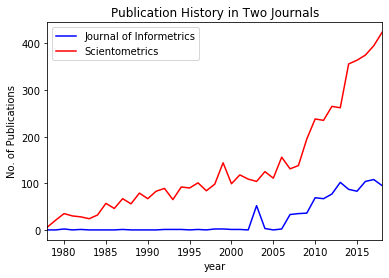

In [23]:
#Create plot:
yd.plot(x='year', y=['Journal of Informetrics', 'Scientometrics'], color=['blue', 'red'], kind='line')
plt.legend(loc = 2)
plt.ylabel(ylabel='No. of Publications')
plt.title(label = 'Publication History in Two Journals')
plt.show()